In [8]:
import numpy as np

import tqdm as tqdm

from simplequantnetsim.protocols import MPC_protocol,MPG_protocol,SP_protocol
from simplequantnetsim.graph import network, set_p_edge

import matplotlib.pyplot as plt
from networkx.drawing.layout import *

In [9]:
mkr = ['x','+','d','o','1','2']+['x']*100
dashs = ['-.','--',':','-']+['-']*100
cols = ['gray','g','b','orange','r','k','purple']+['k']*100
linewidth = 2.2
mks = 5.5
fontsize = 14

Find the ER for the MPC, MPG, and SP protocols

In [10]:
size = 5
G =  network(size,size) # i.e. 6 x 6 networkx graph
nodes = list(G.nodes)

In [11]:
funcs= [MPC_protocol,MPG_protocol,SP_protocol]
p_range = np.linspace(1, 0.2, 100)
ER = np.zeros((len(funcs),len(p_range)))
timesteps = 1000 
reps = 200

users = [(2, 2), (0, 0), (0, 4), (4, 0), (4, 4)]
    
for i,p in enumerate(tqdm.tqdm(p_range)):# tqdm_notebook 
    set_p_edge(G,p_op = p)
    for j,function in enumerate(funcs):         
        er,multipartite_gen_time, links_used = function(G,users,timesteps=timesteps,reps=reps)
        ER[j,i]+=er

100%|██████████| 100/100 [31:56<00:00, 19.17s/it]


## plot Figure

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Aaron\AppData\Local\Temp\ipykernel_23576\2043260863.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('ER ($\mathregular{GHZ}_5/\ \\mathregular{T_{slot}}$)',fontsize=fontsize)


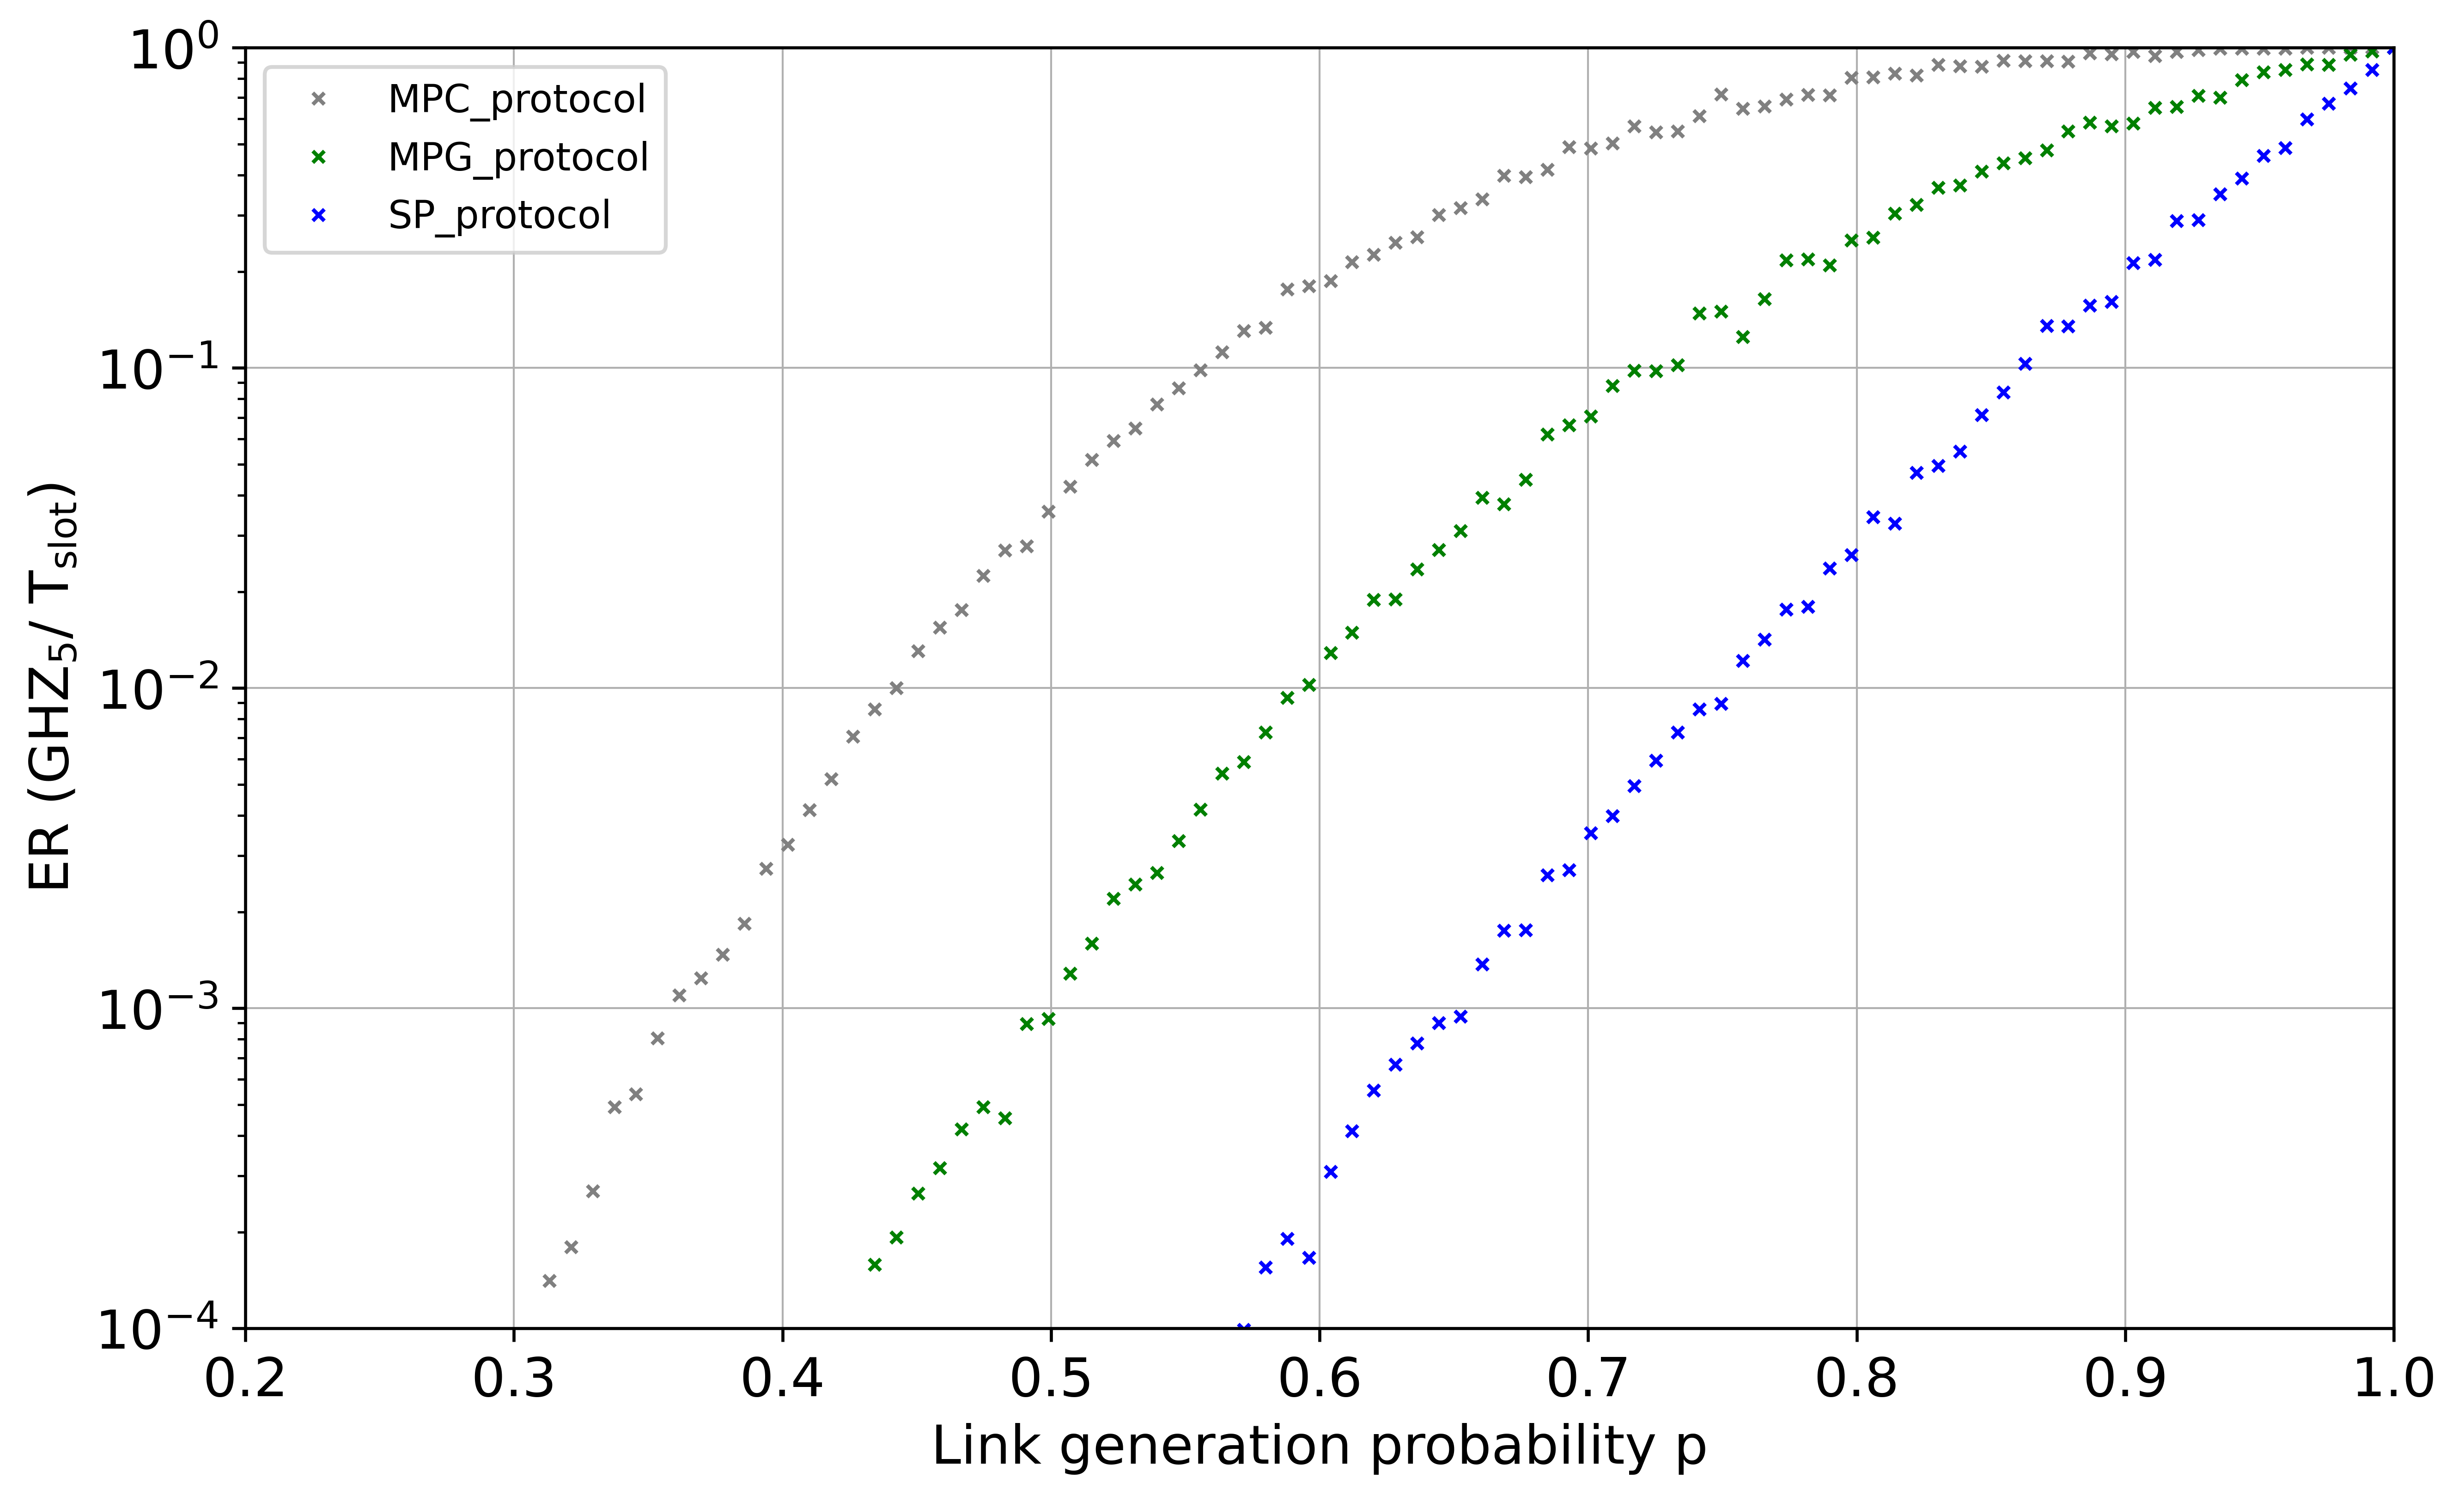

In [12]:
p_range = np.linspace(1, 0.2, 100) # xpoints
nom_list = [str(f).split(' ')[1] for f in funcs]
plt.figure(figsize =(10,6),dpi=600 )
plt.grid(linewidth=0.5)
for i in range(len(funcs)):
    y = plt.plot(p_range, ER[i],
                 color = cols[i],
                 marker = "x",
                 linestyle='None',
                 markersize = 3,
                #  alpha = 0.5,
                #  linewidth=linewidth,
                 label = nom_list[i])
plt.yscale('log')
plt.legend(fontsize=10)
plt.tick_params(labelsize=fontsize)

plt.xlabel('Link generation probability p',fontsize=fontsize)
plt.ylabel('ER ($\mathregular{GHZ}_5/\ \\mathregular{T_{slot}}$)',fontsize=fontsize)

ax = plt.gca()
ax.set_xlim([0.2, 1])
ax.set_ylim([0.0001, 1])

plt.savefig("figures/ER_v_p.png", dpi=600)